IMPORT LIBRARIES

In [74]:
pip install scikit-learn

In [75]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,auc

from sklearn.preprocessing import label_binarize
from itertools import cycle
import itertools
import random
from sklearn.neighbors import KNeighborsClassifier

import time

Read dataset

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df = pd.read_csv("/content/drive/MyDrive/ISRO project/cicddos2019_dataset.csv")

In [14]:
df.head(3)


Unnamed: 0  Protocol  Flow Duration  Total Fwd Packets  \
0    0.058034       1.0   0.000000e+00           0.000012   
1    0.058037       1.0   0.000000e+00           0.000012   
2    0.058040       1.0   8.333421e-09           0.000012   

   Total Backward Packets  Fwd Packets Length Total  Bwd Packets Length Total  \
0                     0.0                  0.000035                       0.0   
1                     0.0                  0.000030                       0.0   
2                     0.0                  0.000030                       0.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  ...  \
0                0.00825               0.124355                0.087885  ...   
1                0.00713               0.107461                0.075946  ...   
2                0.00713               0.107461                0.075946  ...   

   Active Mean  Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
0          0.0         0.0         0.0         0.0        0.0       0.0   
1          0.0         0.0         0.0         0.0        0.0       0.0   
2          0.0         0.0         0.0         0.0        0.0       0.0   

   Idle Max  Idle Min    Label   Class  
0       0.0       0.0  Portmap  Attack  
1       0.0       0.0  Portmap  Attack  
2       0.0       0.0  Portmap  Attack  

[3 rows x 80 columns]

In [15]:
#remove the space before the colum names
df.columns=df.columns.str.strip()

In [16]:
# Unique values in the label target column
df.loc[:,'Label'].unique()

array(['Portmap', 'NetBIOS', 'UDPLag'], dtype=object)

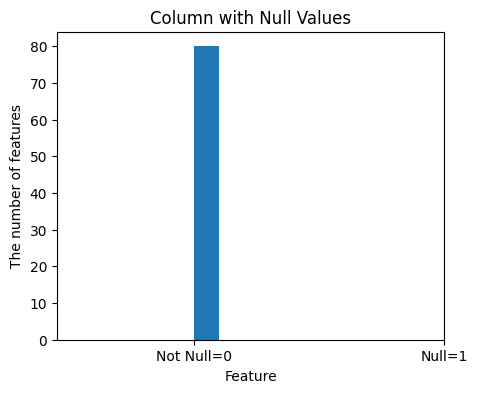

In [17]:
plt.figure(1,figsize=(5,4))
plt.hist(df.isna().sum())
#set the tital and axis labels
plt.xticks([0,1],labels=['Not Null=0','Null=1'])
plt.title('Column with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')
#show the plot
plt.show()


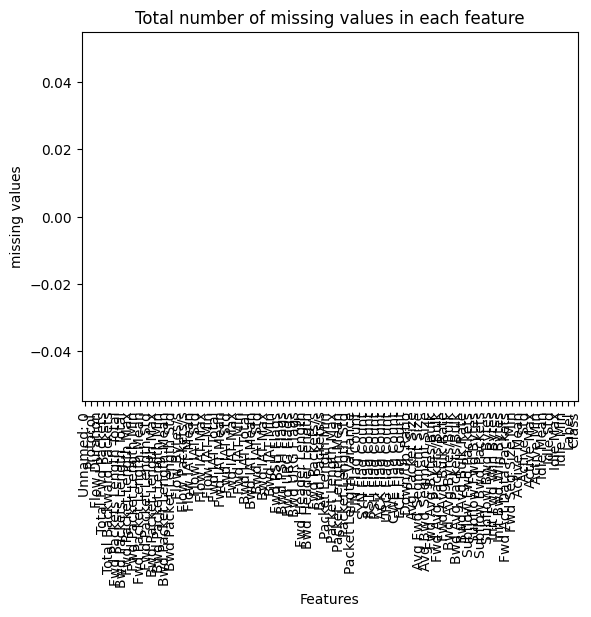

In [18]:
def plotMissingValues(dataframe):
  missing_values=dataframe.isnull().sum()#counting null values for each column
  missing_values.plot(kind='bar')
  plt.xlabel('Features')
  plt.ylabel('missing values')
  plt.title('Total number of missing values in each feature')
  plt.show()
plotMissingValues(df)

In [19]:
#removing the null values
data_f=df.dropna()

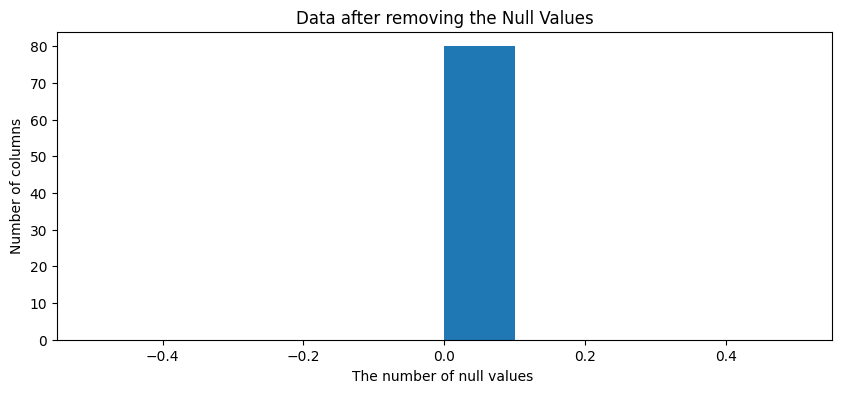

In [20]:
#checking the null values in the dataset
plt.figure(1,figsize=(10,4))
plt.hist(data_f.isna().sum())
#set the title and axis labels
plt.title('Data after removing the Null Values')
plt.xlabel('The number of null values ')
plt.ylabel('Number of columns')
#show the plot
plt.show()


In [21]:
pd.set_option('use_inf_as_na',True)
null_values=data_f.isnull().sum

In [22]:
#to know the data types of the columns
(data_f.dtypes=='object')

Unnamed: 0                False
Protocol                  False
Flow Duration             False
Total Fwd Packets         False
Total Backward Packets    False
                          ...  
Idle Std                  False
Idle Max                  False
Idle Min                  False
Label                      True
Class                      True
Length: 80, dtype: bool

In [23]:
#Convert the labels in the DataFrame to numerical values
data_f['Label']=data_f['Label'].map({'NetBIOS':0,'DDos':1})

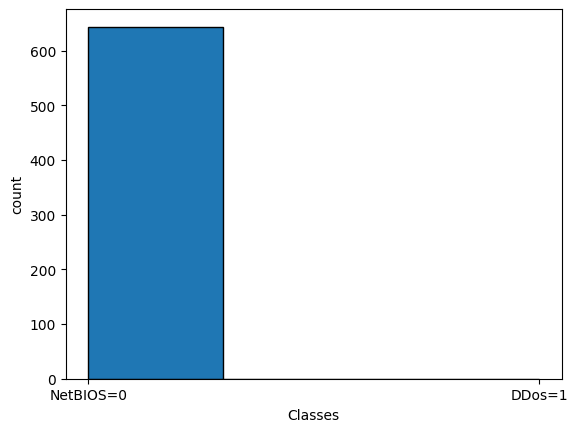

In [24]:
#print the DataFrame
plt.hist(data_f['Label'],bins=[0,0.3,0.7,1],edgecolor='black')
plt.xticks([0,1],labels=['NetBIOS=0','DDos=1'])
plt.xlabel("Classes")
plt.ylabel("count")
plt.show()

Data exploring

In [25]:
df.describe()

Unnamed: 0     Protocol  Flow Duration  Total Fwd Packets  \
count  1384.000000  1384.000000   1.384000e+03        1384.000000   
mean      0.192823     0.933696   8.903800e-03           0.000024   
std       0.133386     0.200800   7.622047e-02           0.000127   
min       0.058034     0.000000   0.000000e+00           0.000000   
25%       0.059163     1.000000   1.458349e-08           0.000012   
50%       0.304433     1.000000   3.833374e-07           0.000012   
75%       0.305563     1.000000   4.250045e-07           0.000012   
max       0.357916     1.000000   9.963970e-01           0.003565   

       Total Backward Packets  Fwd Packets Length Total  \
count             1384.000000               1384.000000   
mean                 0.000028                  0.000037   
std                  0.000296                  0.000096   
min                  0.000000                  0.000000   
25%                  0.000000                  0.000028   
50%                  0.000000                  0.000030   
75%                  0.000000                  0.000032   
max                  0.009779                  0.003480   

       Bwd Packets Length Total  Fwd Packet Length Max  Fwd Packet Length Min  \
count              1.384000e+03            1384.000000            1384.000000   
mean               7.199526e-07               0.007255               0.106396   
std                8.419688e-06               0.003828               0.054920   
min                0.000000e+00               0.000000               0.000000   
25%                0.000000e+00               0.006569               0.099015   
50%                0.000000e+00               0.007130               0.107461   
75%                0.000000e+00               0.007690               0.115908   
max                1.992487e-04               0.031133               0.469263   

       Fwd Packet Length Mean  ...  Fwd Act Data Packets  Fwd Seg Size Min  \
count             1384.000000  ...           1384.000000       1384.000000   
mean                 0.075623  ...              0.000082          0.918552   
std                  0.038440  ...              0.000345          0.156830   
min                  0.000000  ...              0.000000          0.234174   
25%                  0.069977  ...              0.000053          0.954428   
50%                  0.075946  ...              0.000053          0.954428   
75%                  0.081916  ...              0.000053          0.954428   
max                  0.331643  ...              0.012309          1.000000   

       Active Mean   Active Std   Active Max    Active Min    Idle Mean  \
count  1384.000000  1384.000000  1384.000000  1.384000e+03  1384.000000   
mean      0.000573     0.001524     0.001541  1.580363e-08     0.003058   
std       0.010742     0.029782     0.029841  2.037936e-07     0.030478   
min       0.000000     0.000000     0.000000  0.000000e+00     0.000000   
25%       0.000000     0.000000     0.000000  0.000000e+00     0.000000   
50%       0.000000     0.000000     0.000000  0.000000e+00     0.000000   
75%       0.000000     0.000000     0.000000  0.000000e+00     0.000000   
max       0.345772     1.000000     1.000000  3.851091e-06     0.355178   

          Idle Std     Idle Max     Idle Min  
count  1384.000000  1384.000000  1384.000000  
mean      0.000422     0.003405     0.002855  
std       0.005965     0.031888     0.029981  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       0.096780     0.355178     0.355178  

[8 rows x 78 columns]

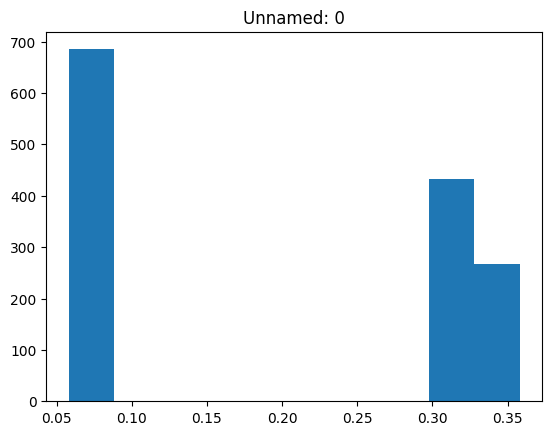

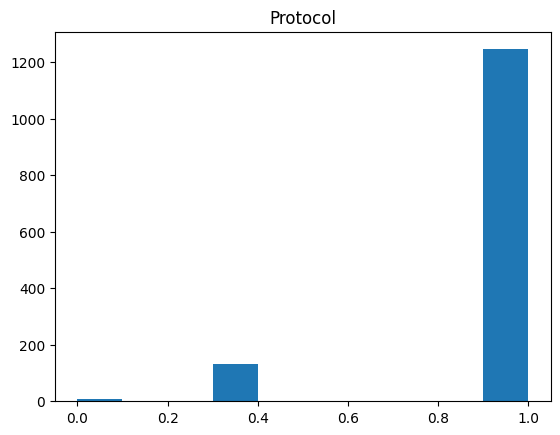

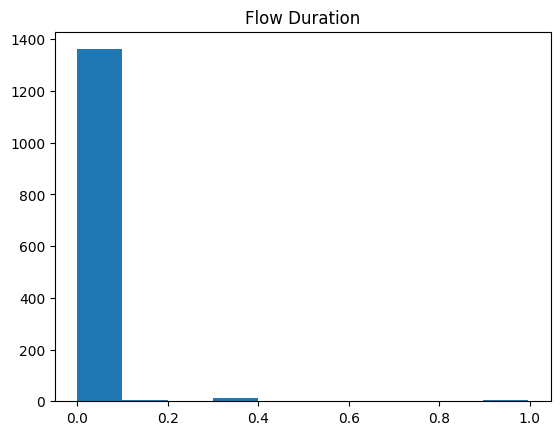

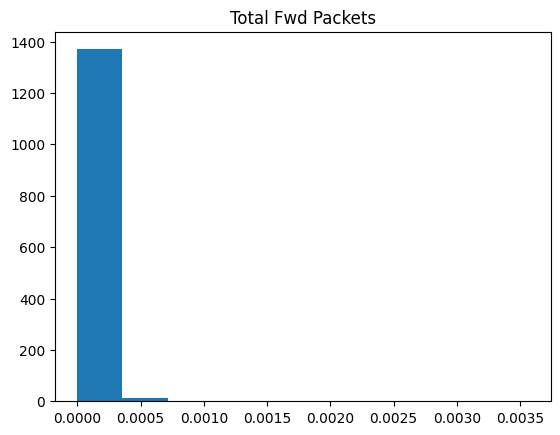

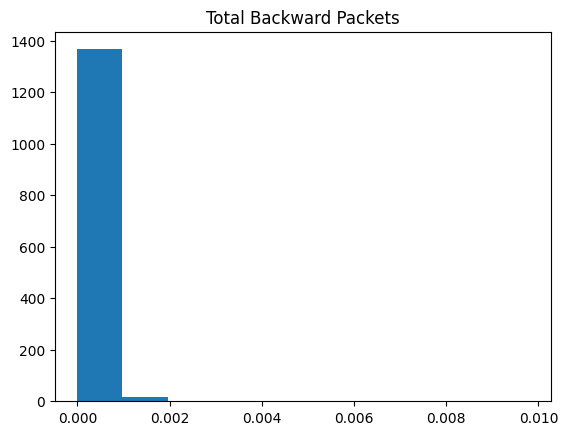

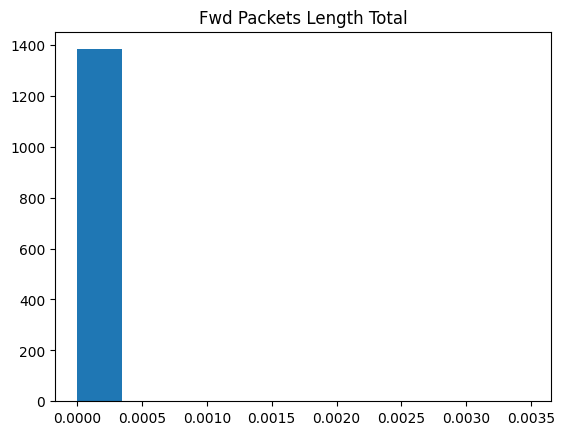

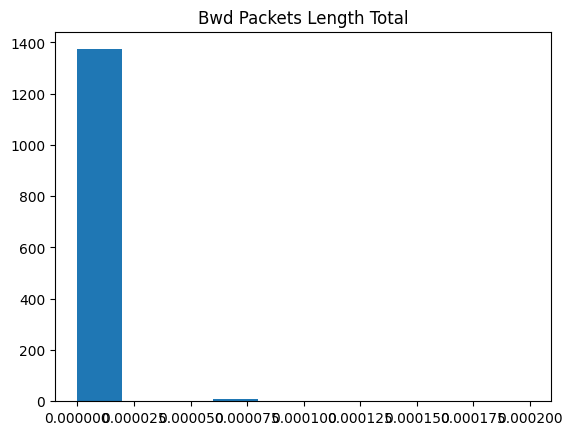

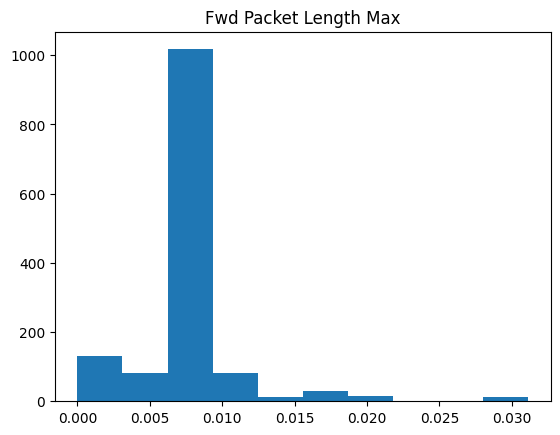

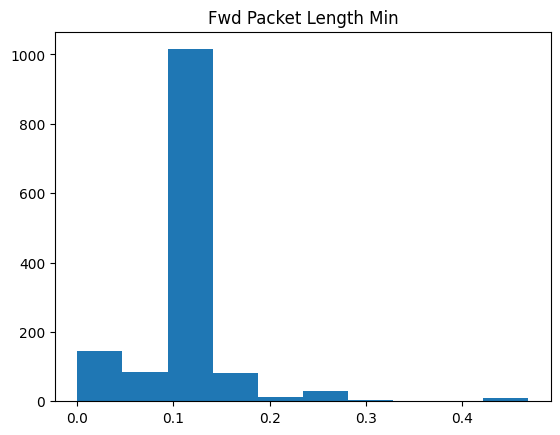

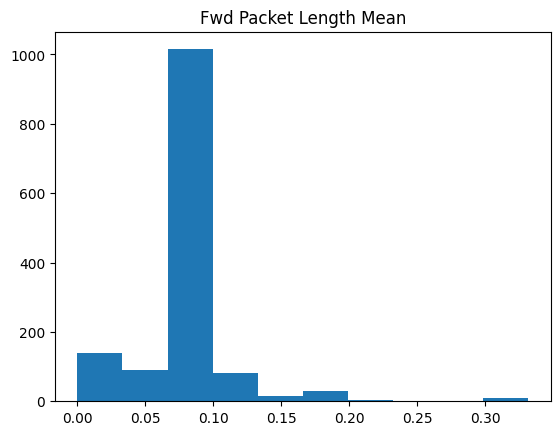

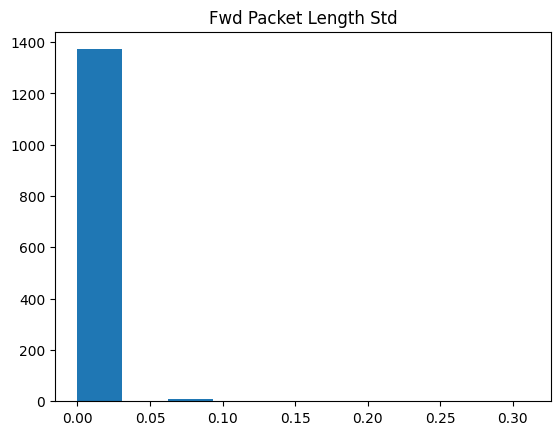

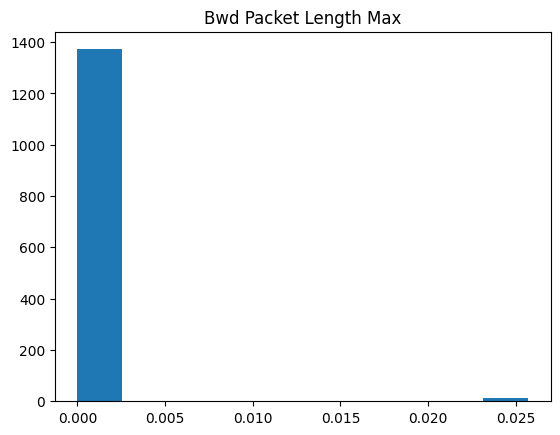

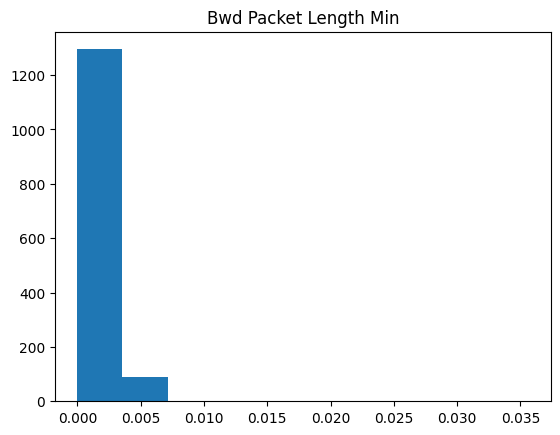

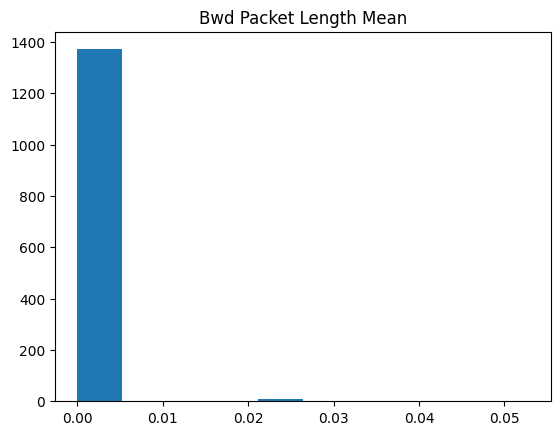

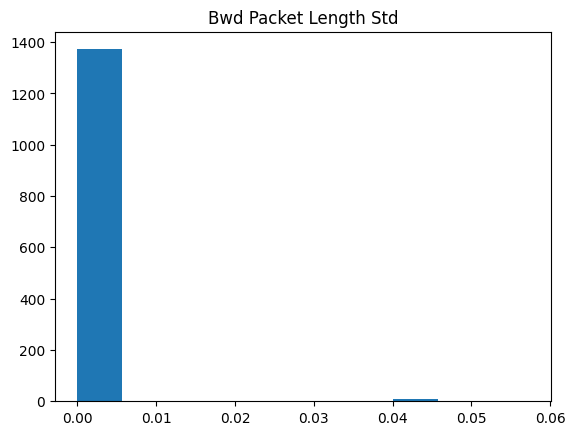

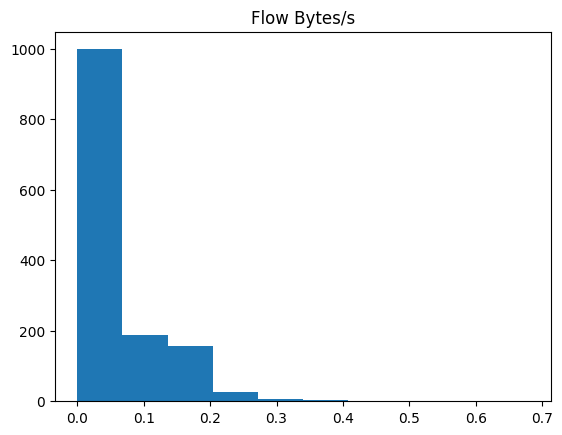

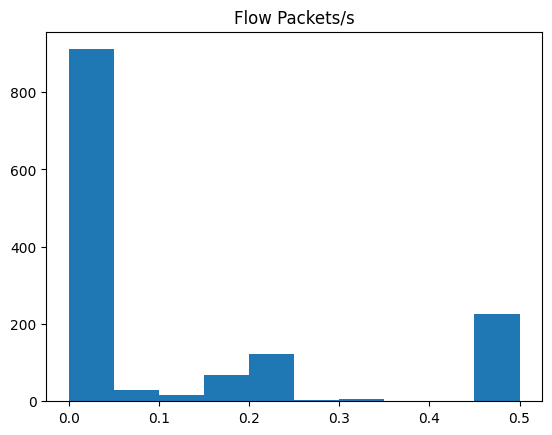

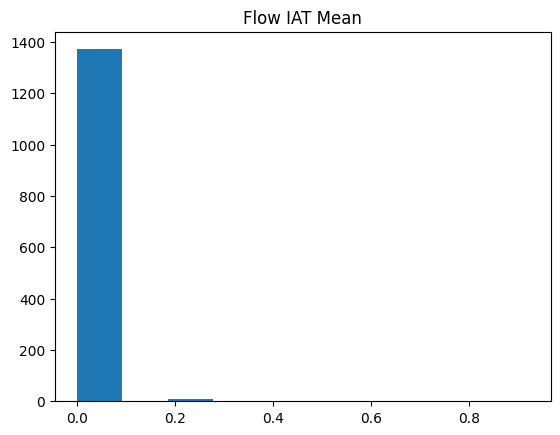

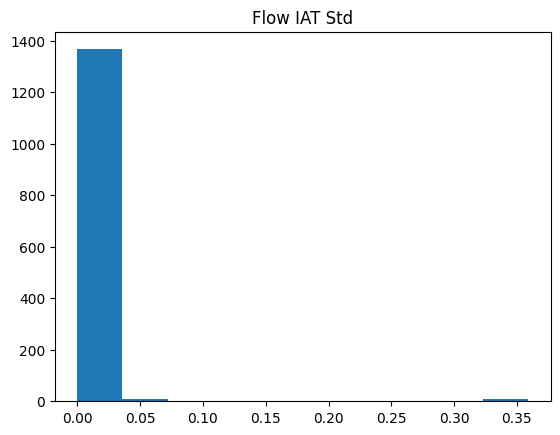

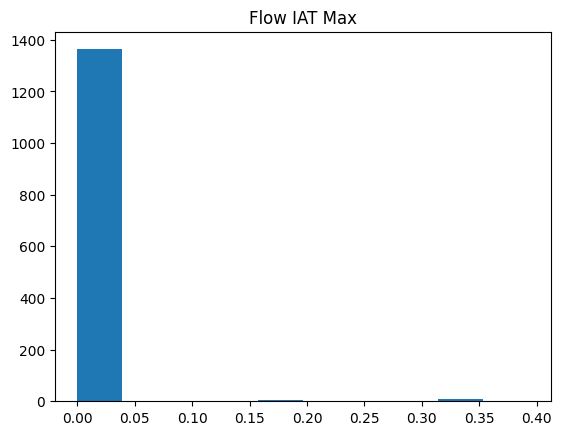

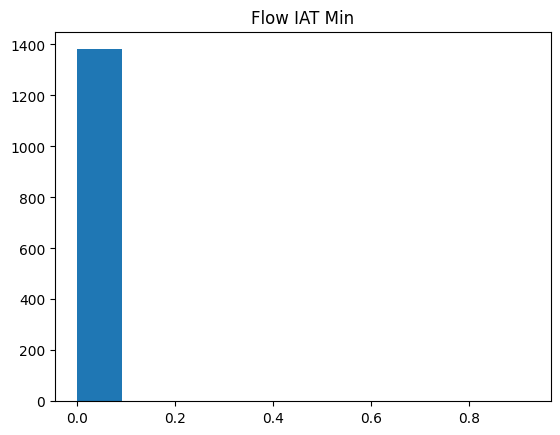

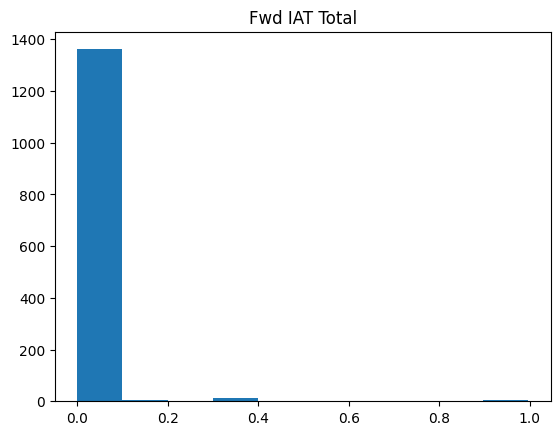

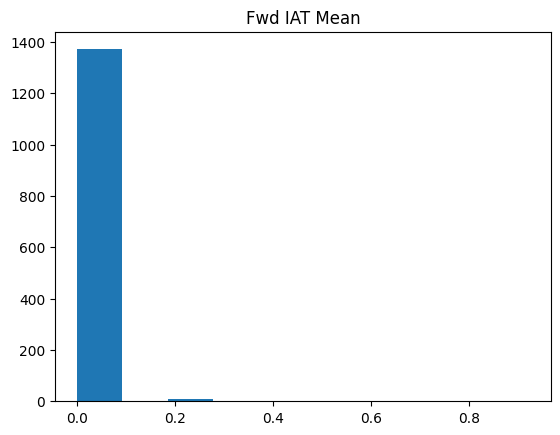

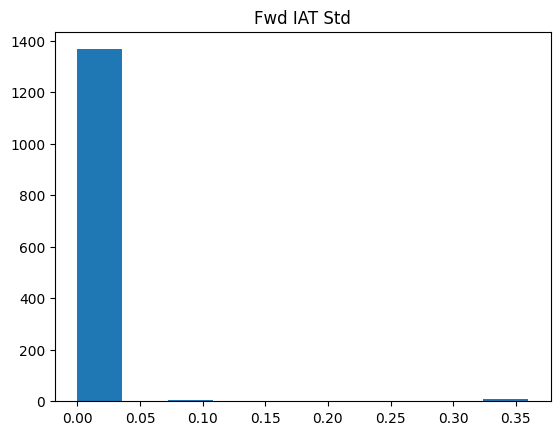

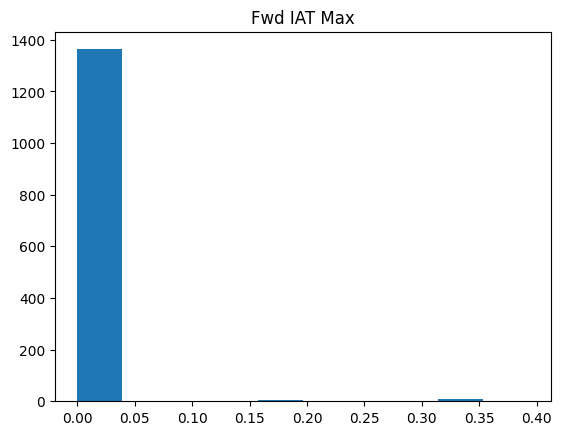

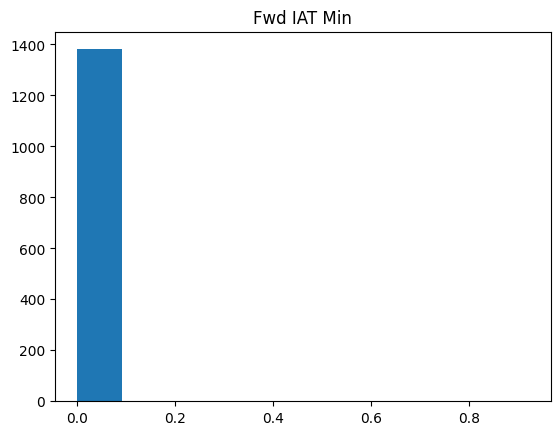

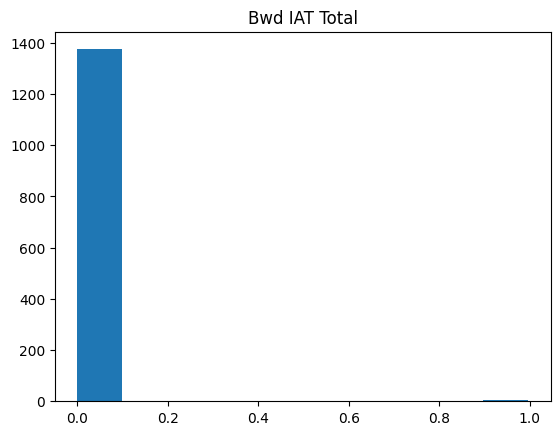

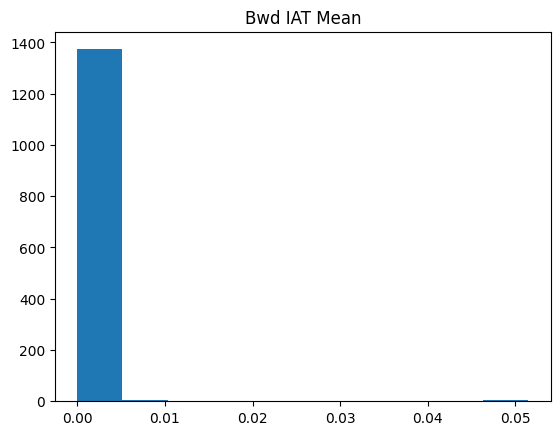

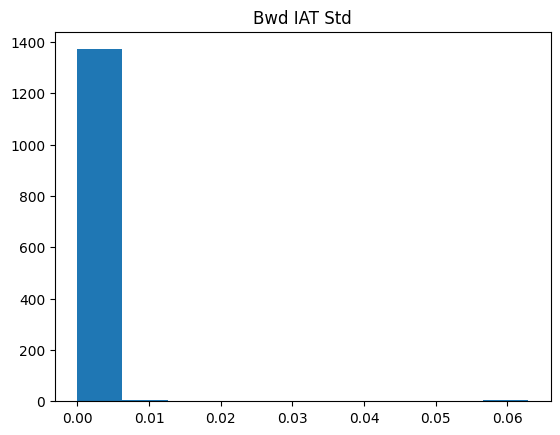

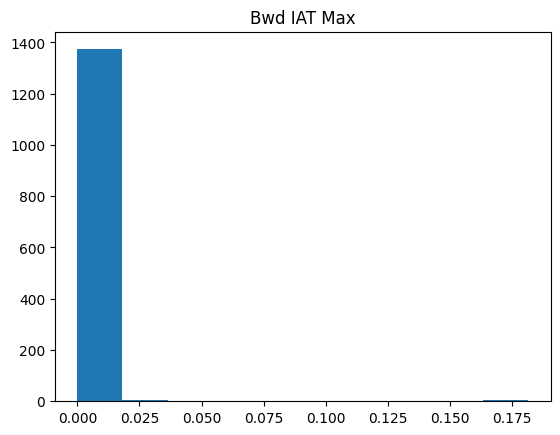

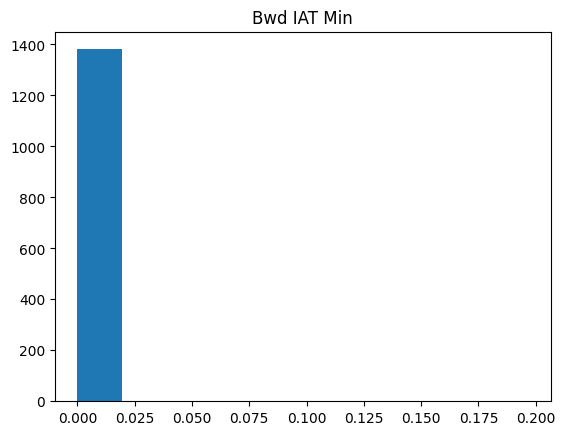

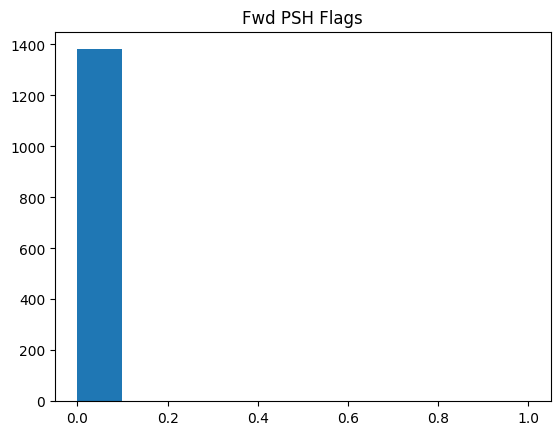

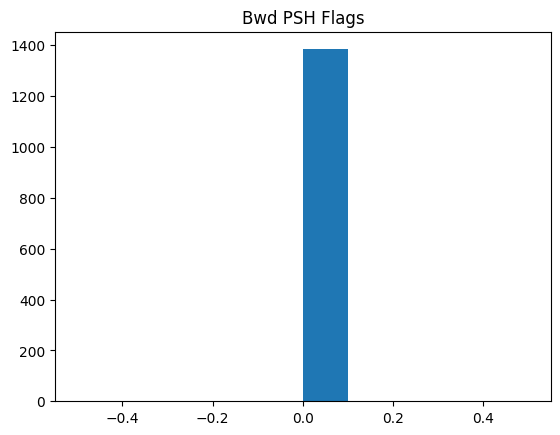

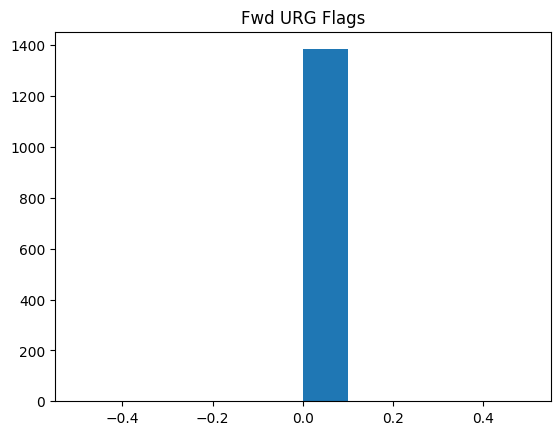

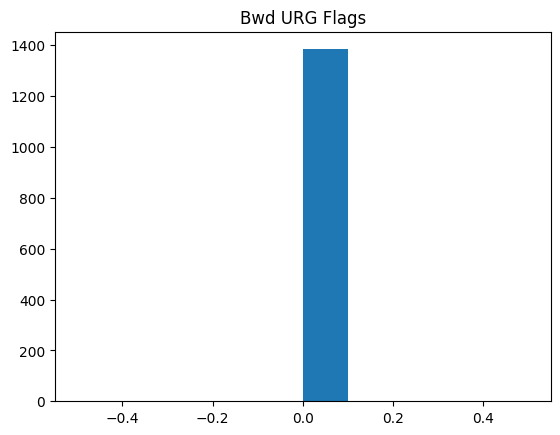

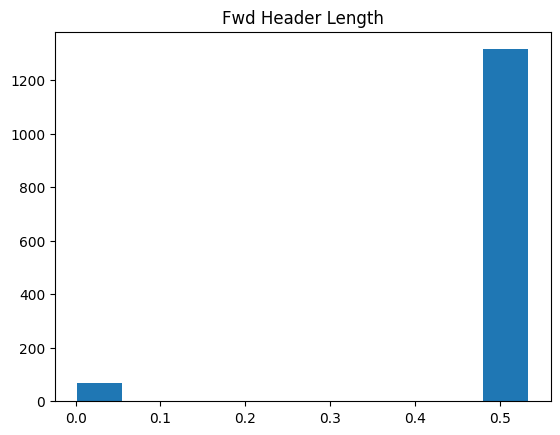

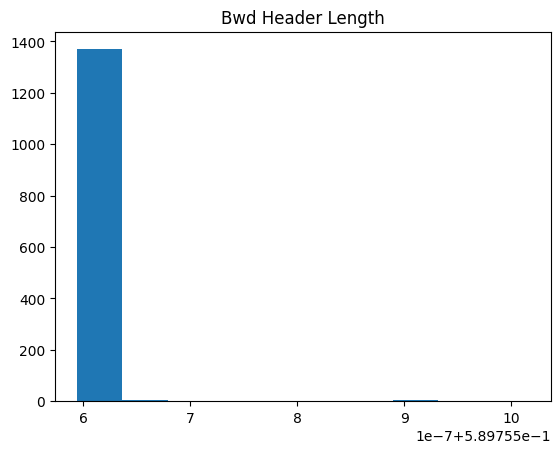

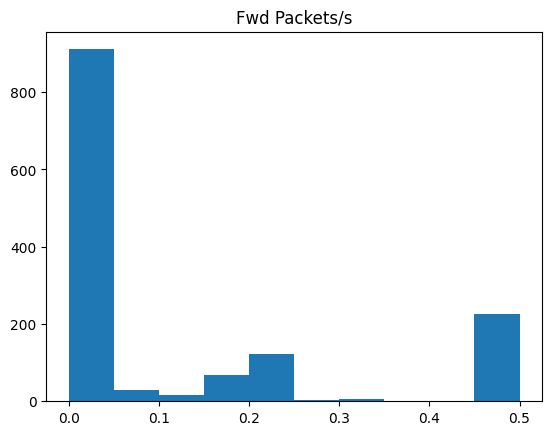

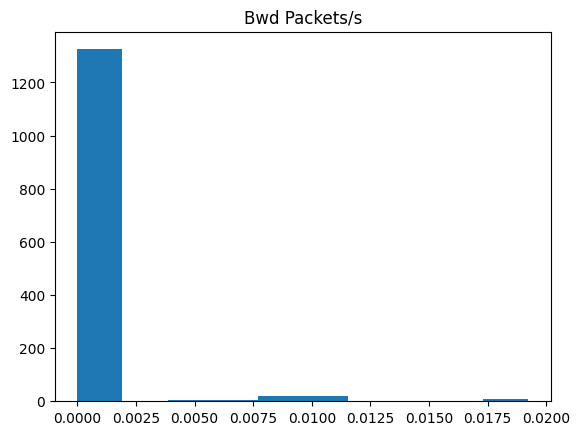

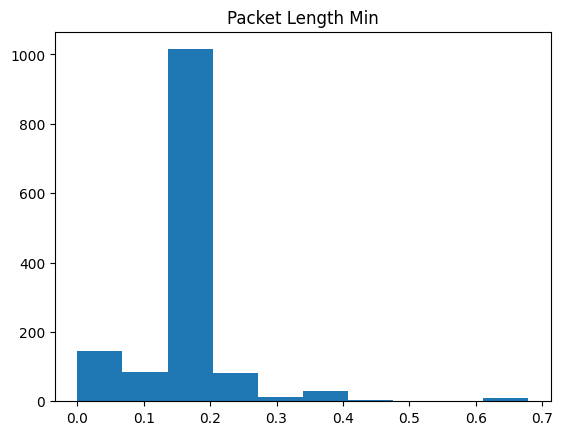

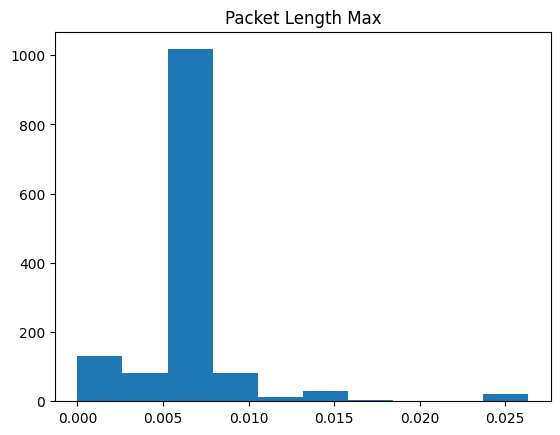

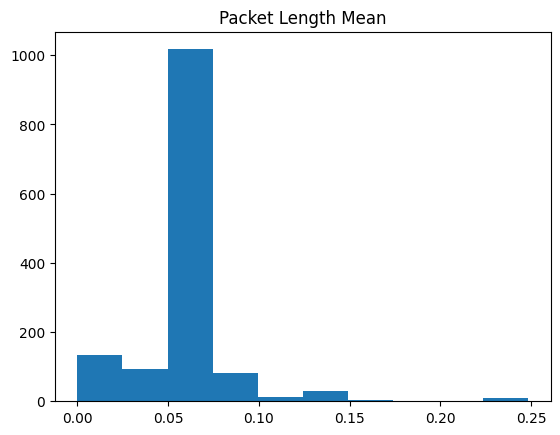

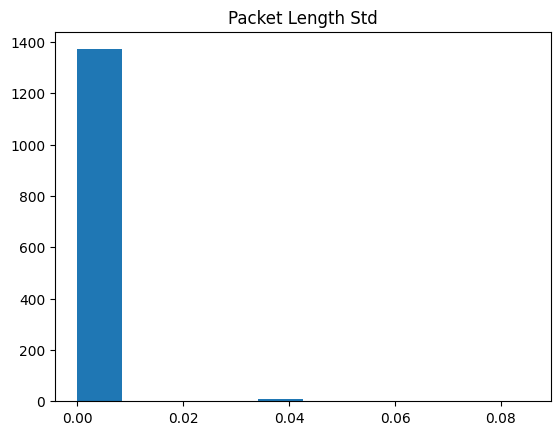

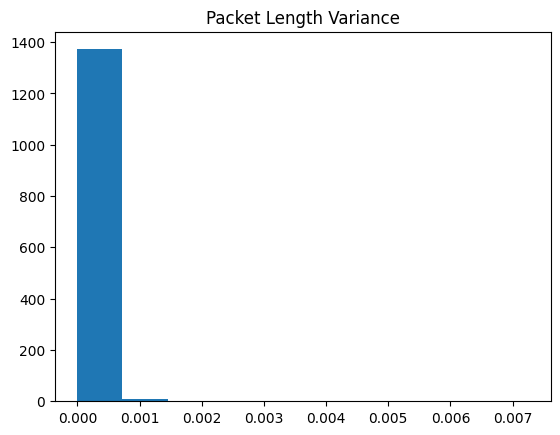

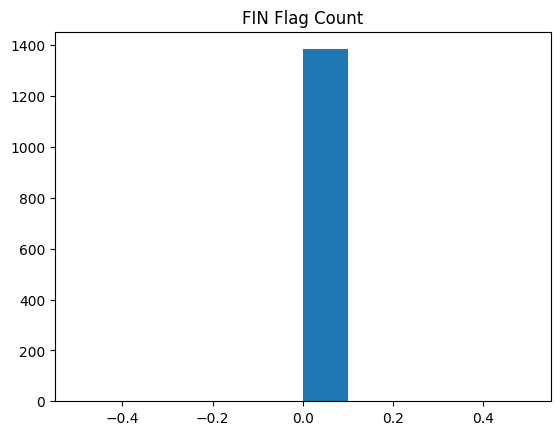

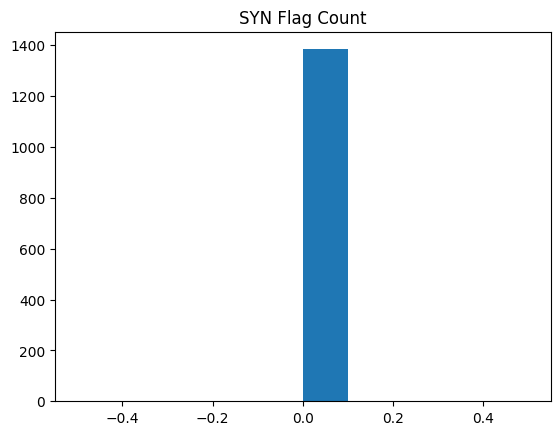

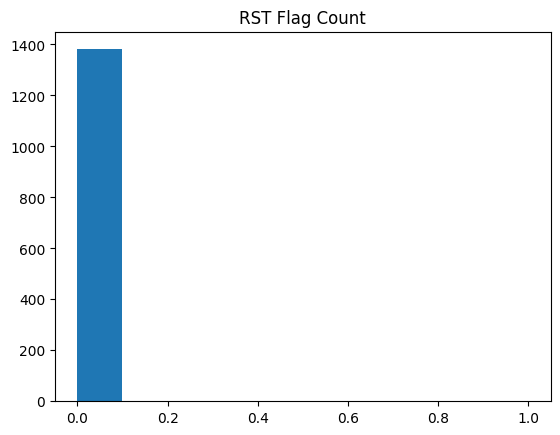

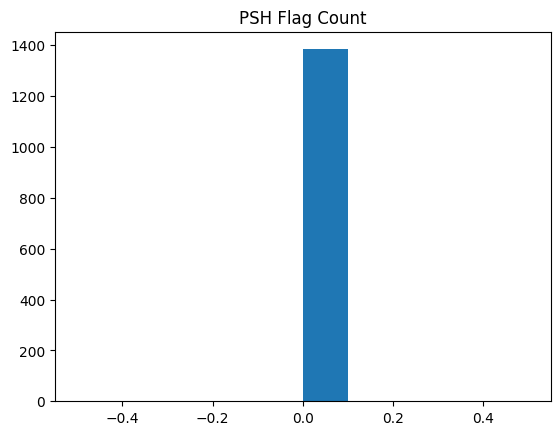

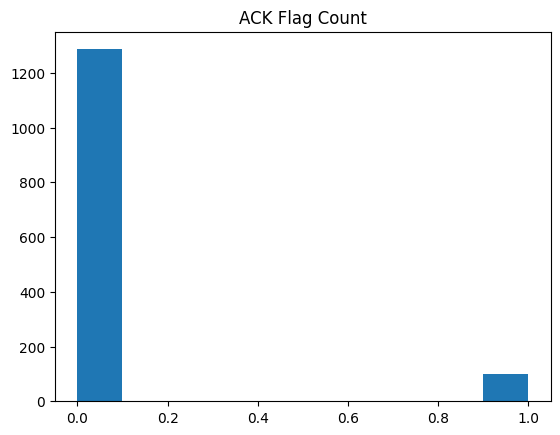

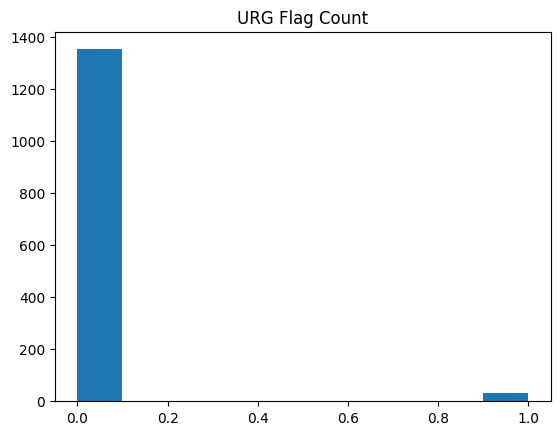

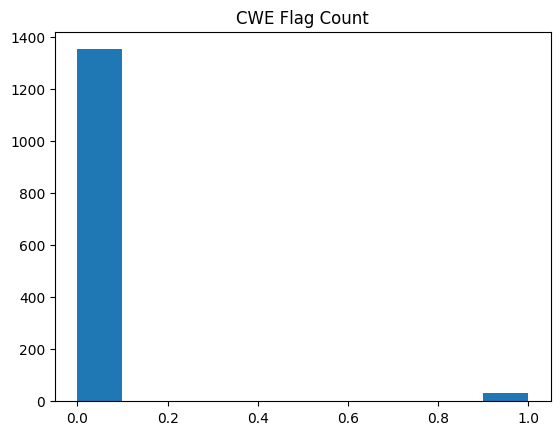

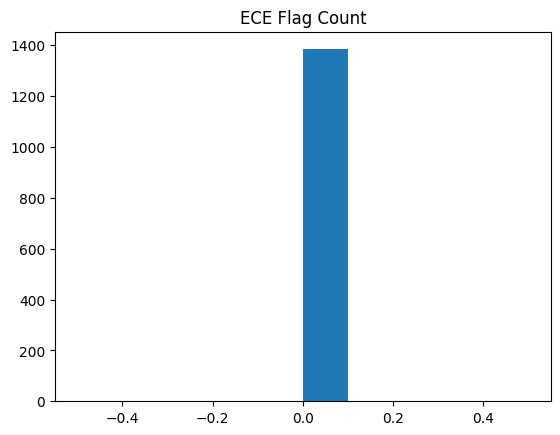

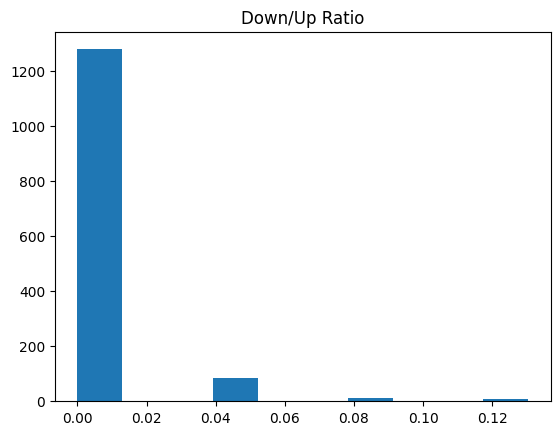

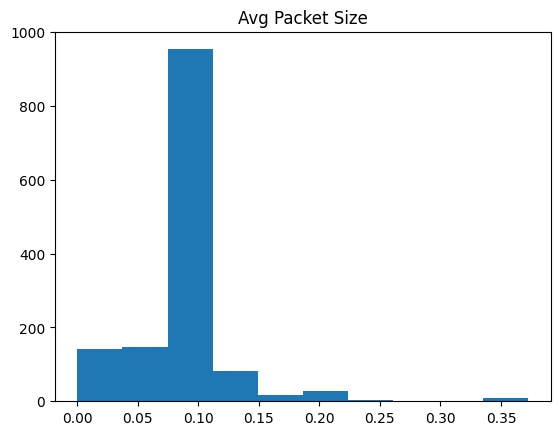

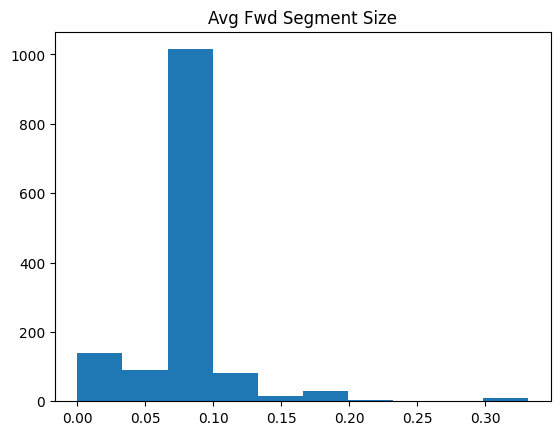

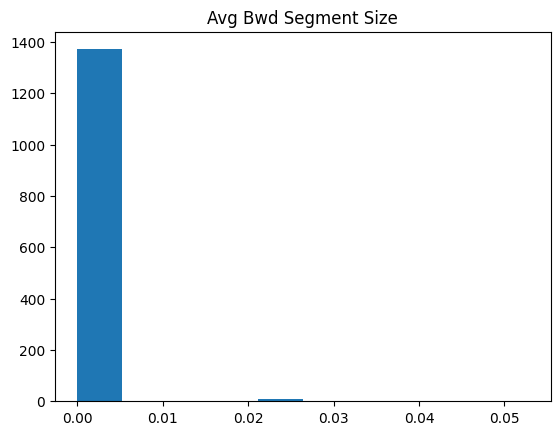

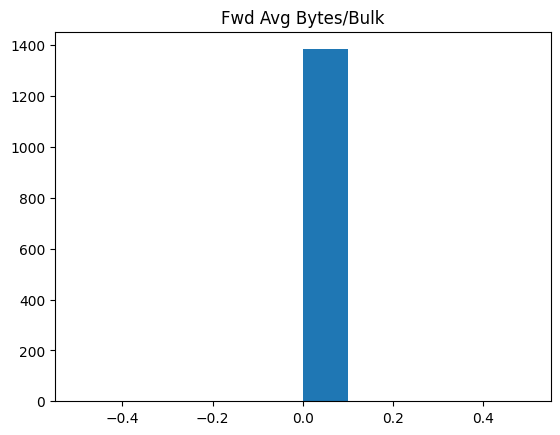

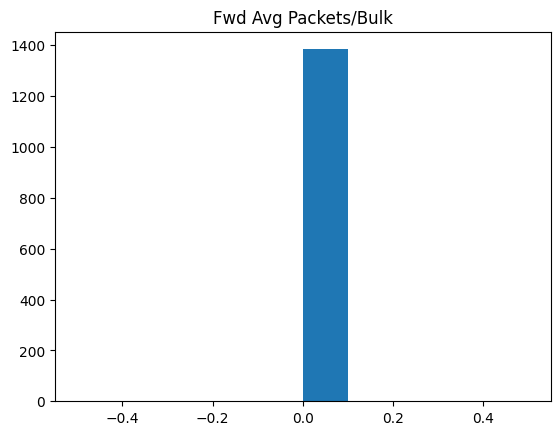

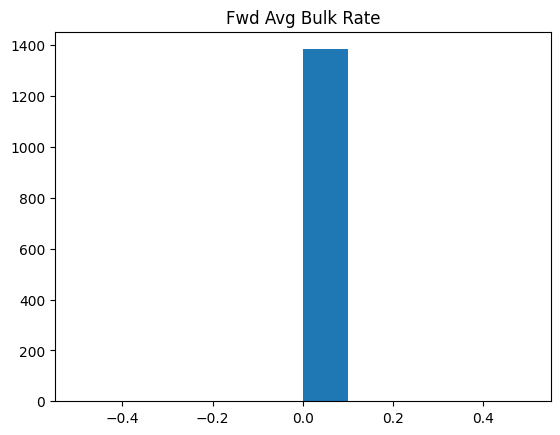

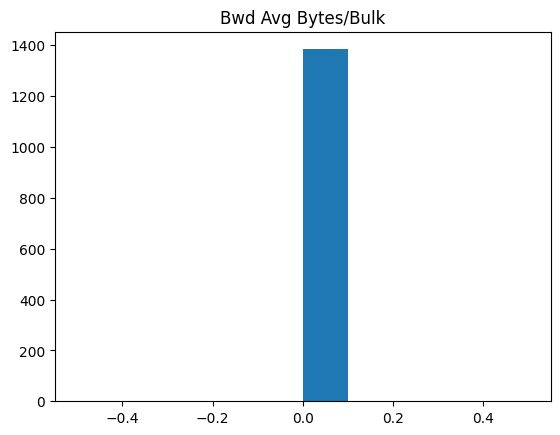

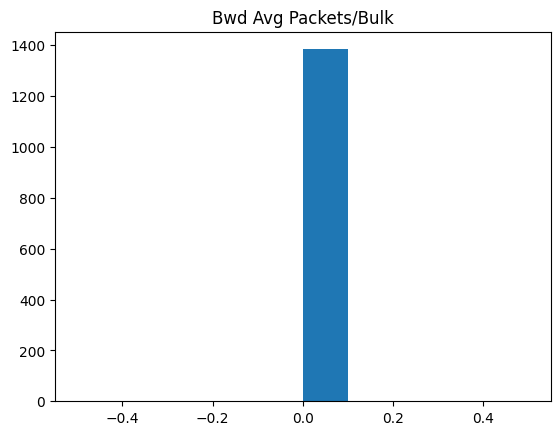

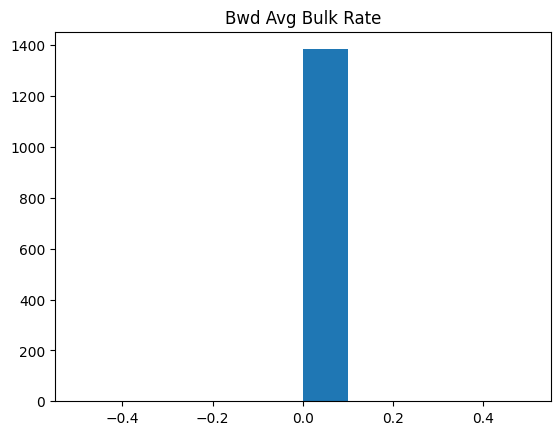

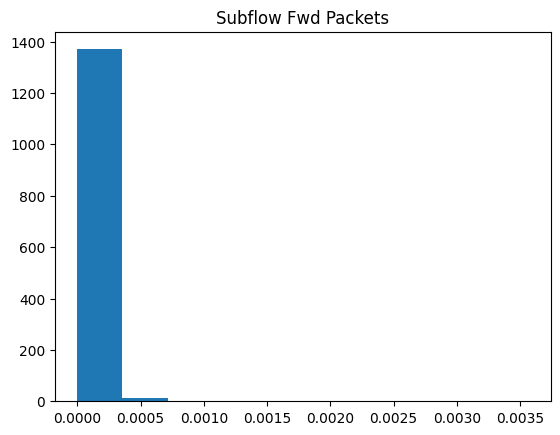

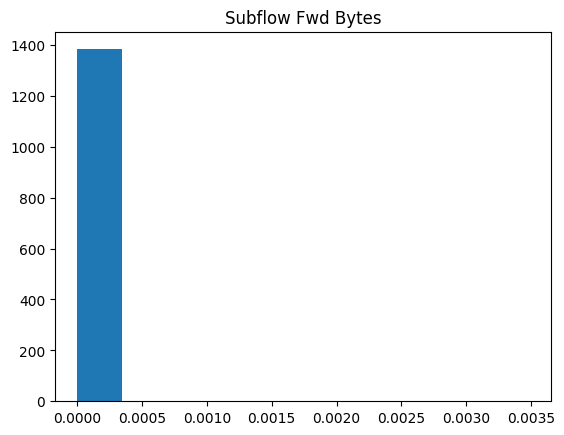

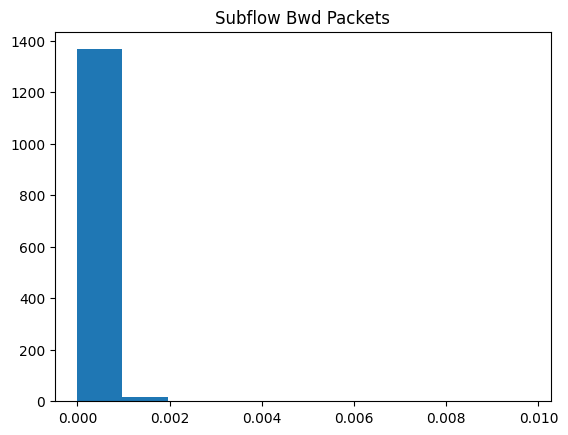

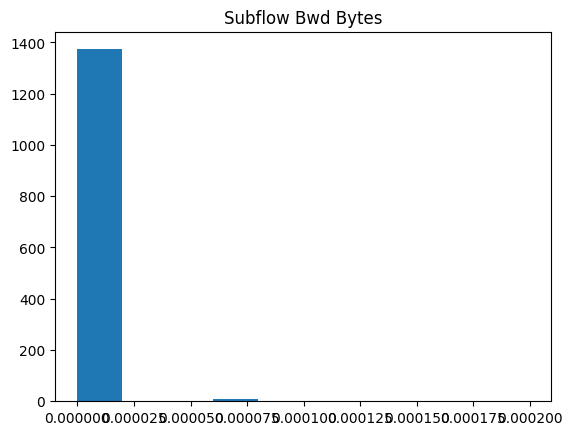

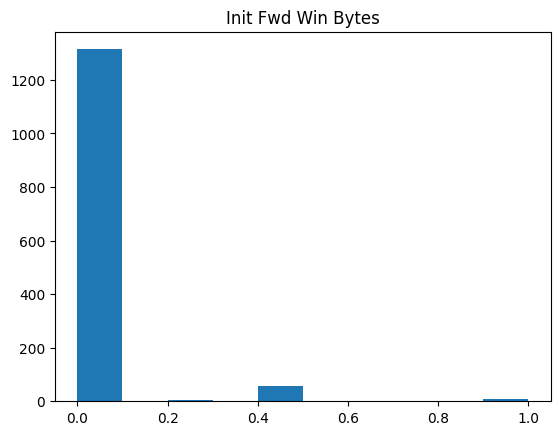

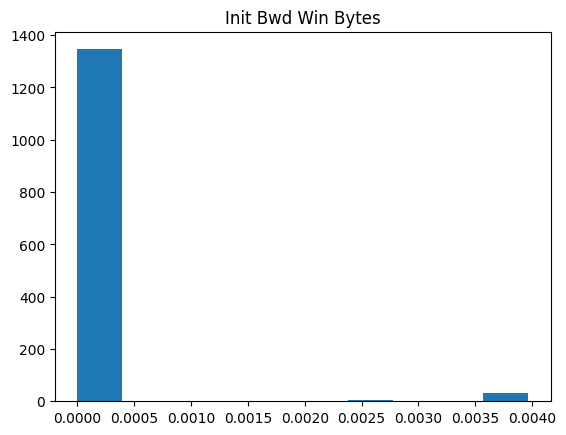

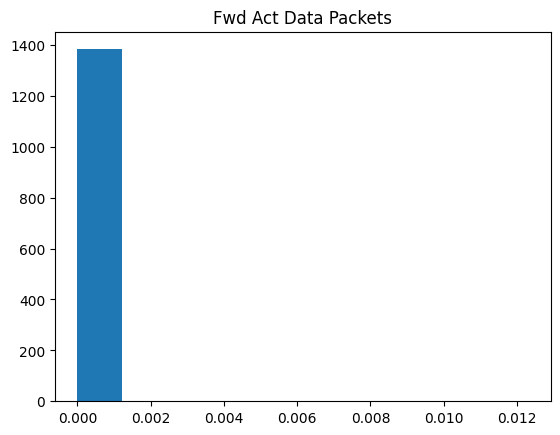

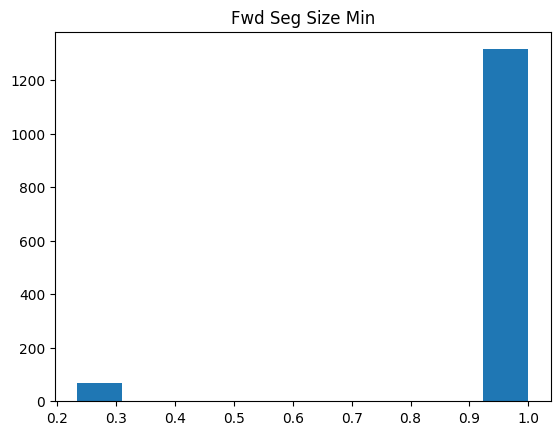

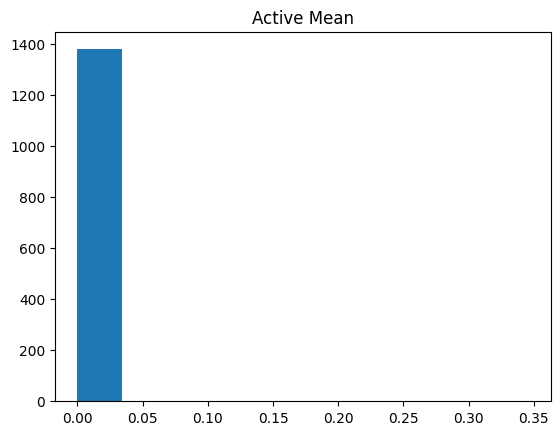

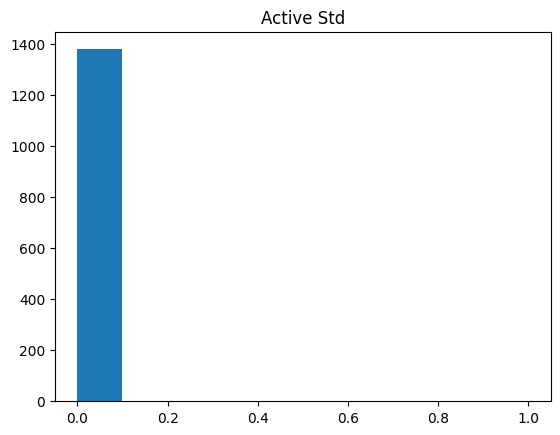

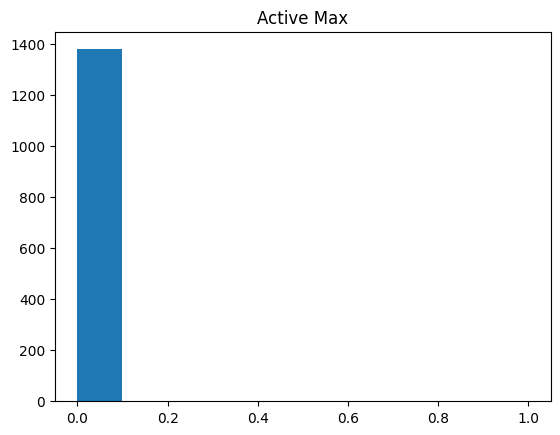

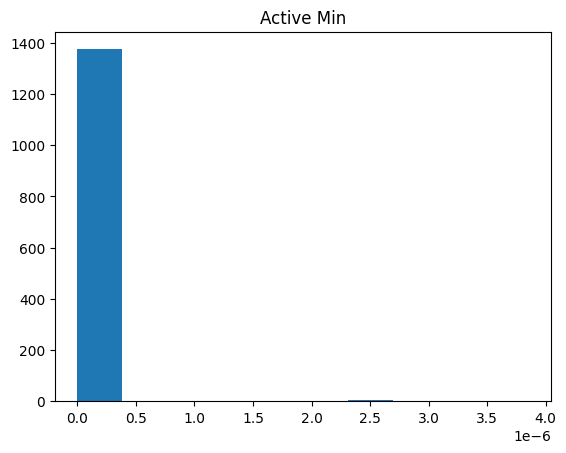

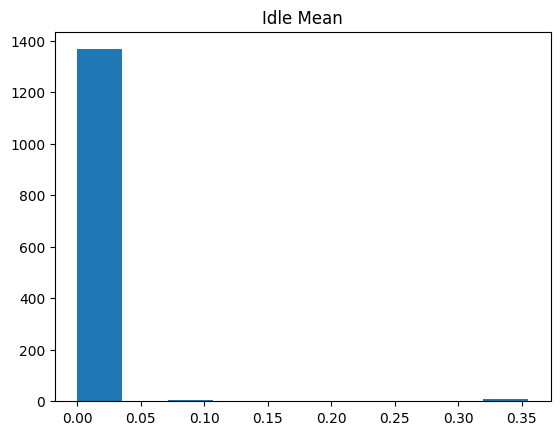

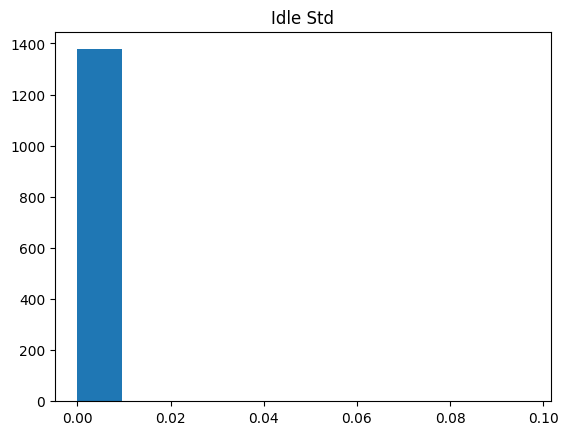

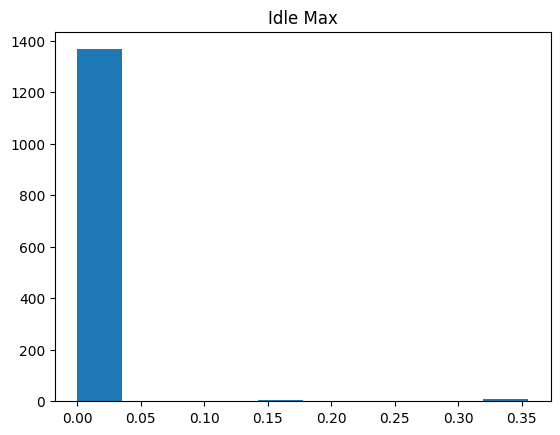

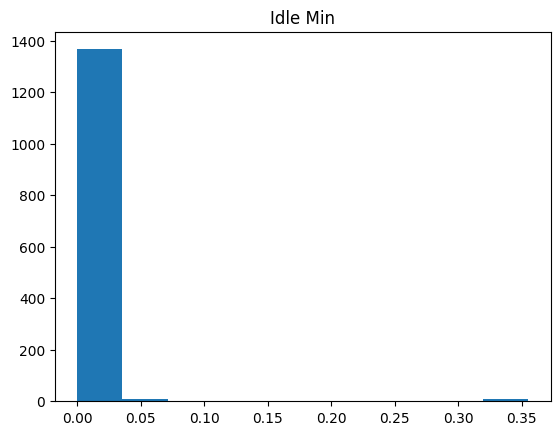

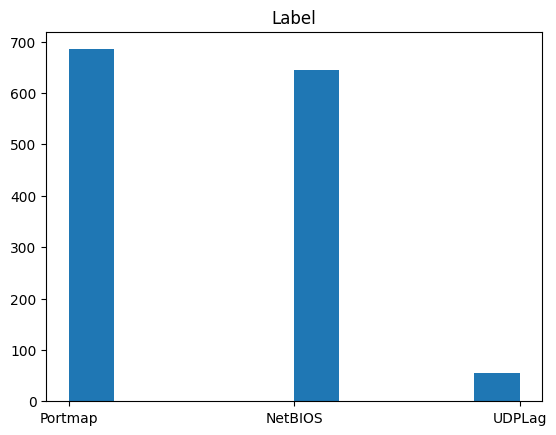

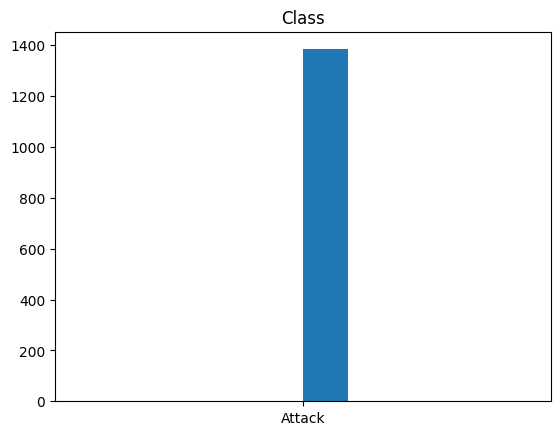

In [26]:
plt.figure(5)
for col in df.columns:
  plt.hist(df[col])
  plt.title(col)
  plt.show()

In [33]:
cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(', '):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [36]:
with open("/content/drive/MyDrive/ISRO project/cicddos2019_dataset.csv", 'r') as f:
    print(f.read())

Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd A

In [38]:
with open("/content/drive/MyDrive/ISRO project/cicddos2019_dataset.csv", 'r') as f:
    print(f.read())

Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd A

In [57]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

Code: Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

<ipython-input-72-0b3faae8a0d0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN


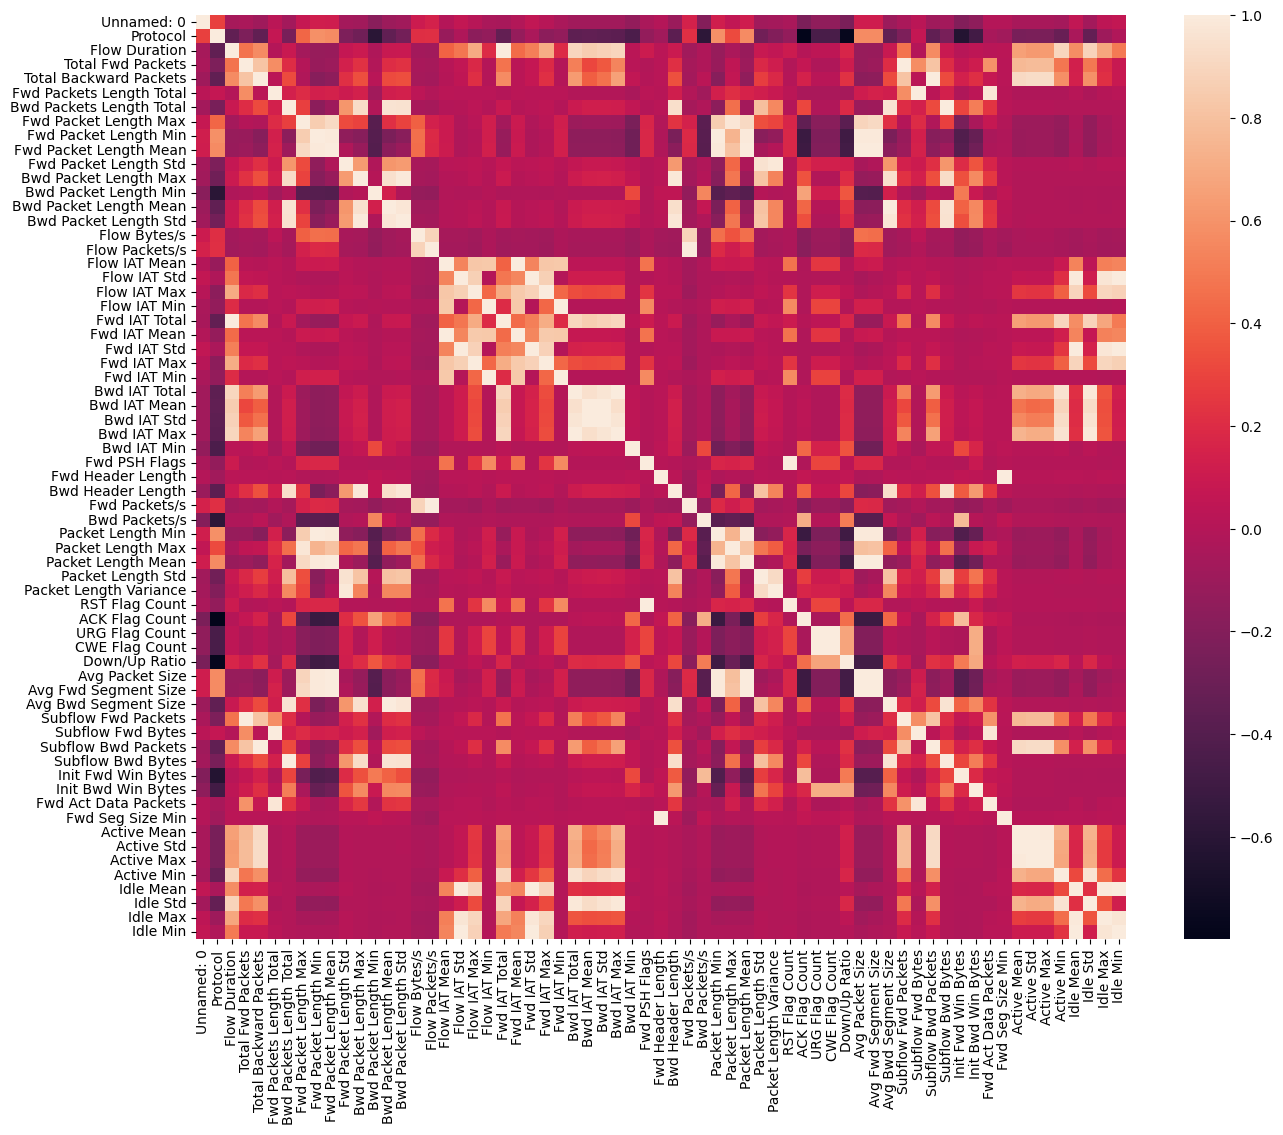

In [72]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()

In [73]:
df['Label'].value_counts

KeyError: ignored

In [70]:
X=df.drop(columns='Label',axis=1)
Y=df['Label']

KeyError: ignored

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [51]:
print("The train dataset size=",X_train.shape)
print("The test datset size= ",X_test.shape)

The train dataset size= (968, 79)
The test datset size=  (416, 79)


Training the model

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [47]:
#Code: Importing libraries and splitting the dataset


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


Code: Python implementation of Gaussian Naive Bayes

In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming X_train and Y_train are your training data
# X_test is your test data

# Create a linear regressor object
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(X_train, Y_train)

# Now, you can use the trained model to make predictions on the test data
predictions = linear_regressor.predict(X_test)


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

In [ ]:


forest = ensemble.RandomForestRegressor(**RF_tuned_parameters)
model = forest.fit(train_fold, train_y)
yhat = model.predict(test_fold)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)
 start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
 print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))

In [ ]:
#Code: Python implementation of Decision Tree


# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)
start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))



In [ ]:
#Code: Python code implementation of Random Forest


from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)
start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:", clfr.score(X_test, y_test))

In [ ]:
#Code: Python implementation of Support Vector Classifier


from sklearn.svm import SVC

clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)
start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
print("Train score is:", clfs.score(X_train, y_train))
print("Test score is:", clfs.score(X_test, y_test))



In [ ]:
#Code: Analyse the training and testing accuracy of each model.


names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [87.951, 99.058, 99.997, 99.875, 99.352, 99.793]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

In [ ]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [87.903, 99.052, 99.969, 99.879, 99.352, 99.771]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)


In [ ]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [87.903, 99.052, 99.969, 99.879, 99.352, 99.771]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
